<a href="https://colab.research.google.com/github/mateuszrajca69/r/blob/main/lab2dokonczone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split


# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.


# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, train_size=0.5)

In [3]:
clf = MLPClassifier(hidden_layer_sizes=(100,100), alpha=0.1,solver='adam',verbose=10,
                    learning_rate_init=0.001, early_stopping=True,validation_fraction=0.2,max_iter=1000)

print(clf.fit(X_train,y_train))
score = clf.score(X_test,y_test)
print('score = {}'.format(score)) 
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)




Iteration 1, loss = 0.63651320
Validation score: 0.915143
Iteration 2, loss = 0.29626921
Validation score: 0.939143
Iteration 3, loss = 0.23838141
Validation score: 0.946571
Iteration 4, loss = 0.20648592
Validation score: 0.951000
Iteration 5, loss = 0.18412764
Validation score: 0.955429
Iteration 6, loss = 0.16631096
Validation score: 0.958143
Iteration 7, loss = 0.15436100
Validation score: 0.958429
Iteration 8, loss = 0.14293251
Validation score: 0.959571
Iteration 9, loss = 0.13518020
Validation score: 0.960571
Iteration 10, loss = 0.12733941
Validation score: 0.960143
Iteration 11, loss = 0.12167439
Validation score: 0.963143
Iteration 12, loss = 0.11714638
Validation score: 0.963000
Iteration 13, loss = 0.11360747
Validation score: 0.965857
Iteration 14, loss = 0.10814870
Validation score: 0.965000
Iteration 15, loss = 0.10558944
Validation score: 0.967143
Iteration 16, loss = 0.10175137
Validation score: 0.962857
Iteration 17, loss = 0.10033558
Validation score: 0.965571
Iterat

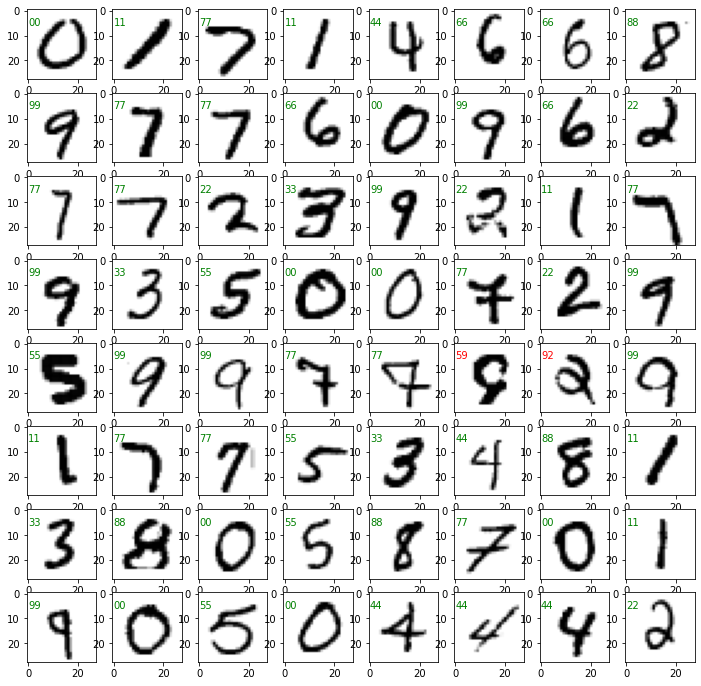

In [4]:
fig=plt.figure(figsize=(12,12))
predicted=clf.predict(X_test)

for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.cm.binary)
  if y_test[i]==predicted[i]:
    ax.text(0,6,predicted[i]+''+y_test[i],color="green")
  else:
    ax.text(0,6,predicted[i]+''+y_test[i],color="red")

  


In [5]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3409
           1       0.99      0.98      0.98      3949
           2       0.96      0.97      0.97      3500
           3       0.96      0.96      0.96      3557
           4       0.98      0.96      0.97      3398
           5       0.96      0.97      0.96      3203
           6       0.98      0.98      0.98      3444
           7       0.98      0.97      0.97      3637
           8       0.96      0.97      0.96      3437
           9       0.95      0.96      0.96      3466

    accuracy                           0.97     35000
   macro avg       0.97      0.97      0.97     35000
weighted avg       0.97      0.97      0.97     35000



In [6]:
print(metrics.confusion_matrix(y_test, predicted))

[[3354    0    6    3    1   14   15    4    7    5]
 [   1 3875   23   14    4    1    3    6   18    4]
 [  11    5 3406   18    6    6    6   17   22    3]
 [   0    3   32 3418    0   38    1   17   34   14]
 [   6    8   15    0 3270    3   12   12    9   63]
 [  10    2    4   37    4 3097   14    4   17   14]
 [  15    6    5    0   10   36 3359    0   13    0]
 [   2   13   25    8    9    5    1 3531    5   38]
 [   7   11   15   28    1   17   10    5 3323   20]
 [   9    9    1   28   24   12    1   19   21 3342]]


In [9]:
# Load dataset with faces
from sklearn.datasets import fetch_lfw_people

# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=100, resize=0.50)  
print(lfw_people.images.shape)


# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
# to get real names, not digits
target_names = lfw_people.target_names

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Image shape: ",X_train.shape)
# dimension of face image
nfaces, h, w = lfw_people.images.shape
print("Image shape: ", h, w)

(1140, 62, 47)
Image shape:  (855, 2914)
Image shape:  62 47


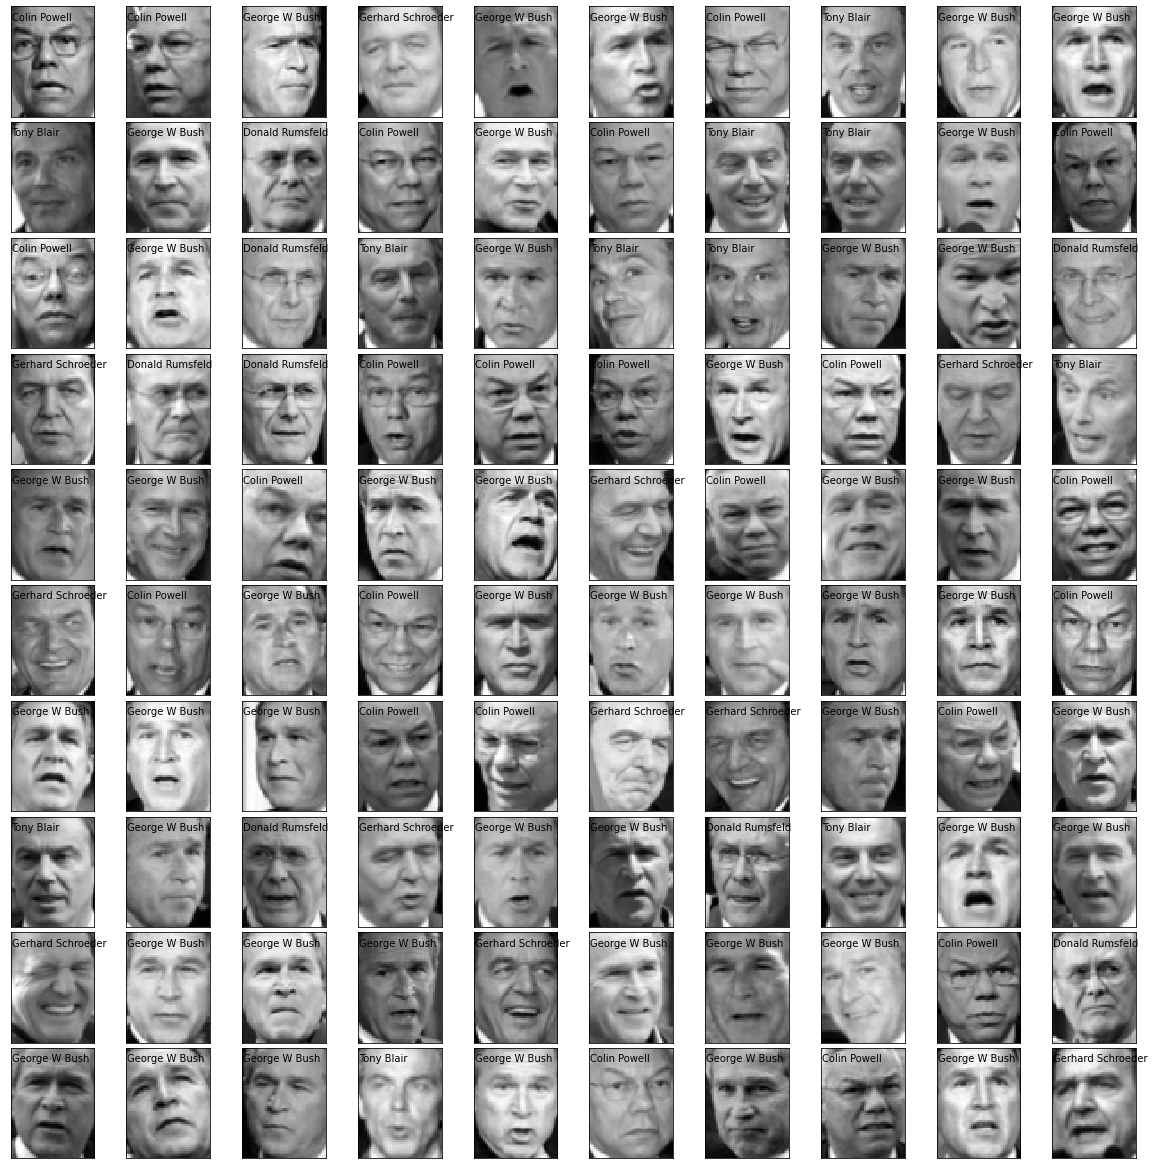

In [10]:
# tu rysujemy twarze
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  ax.text(0, 7, str(target_names[y_test[i]]))

In [11]:

# train the model
clf = MLPClassifier(hidden_layer_sizes=(100,100), activation='relu', alpha=1, learning_rate_init=0.001, early_stopping=True, 
                    solver='adam', verbose=10, validation_fraction=0.2, max_iter=1000, n_iter_no_change=90)
                 

print(clf.fit(X_train, y_train))

# get score
score = clf.score(X_test, y_test)
print("Score = ",score)

# get prediction
Z = clf.predict_proba(X_test)[:,1] # returns probability 
print(Z)

Iteration 1, loss = inf
Validation score: 0.450292
Iteration 2, loss = inf
Validation score: 0.450292
Iteration 3, loss = inf
Validation score: 0.450292
Iteration 4, loss = 93.86566444
Validation score: 0.134503
Iteration 5, loss = 49.36827355
Validation score: 0.426901
Iteration 6, loss = 61.48436963
Validation score: 0.315789
Iteration 7, loss = 68.69355805
Validation score: 0.210526
Iteration 8, loss = 56.33624530
Validation score: 0.450292
Iteration 9, loss = 50.41574640
Validation score: 0.239766
Iteration 10, loss = 64.91579766
Validation score: 0.479532
Iteration 11, loss = 75.48322795
Validation score: 0.450292
Iteration 12, loss = 105.32809562
Validation score: 0.152047
Iteration 13, loss = 48.18485209
Validation score: 0.204678
Iteration 14, loss = 58.16585952
Validation score: 0.409357
Iteration 15, loss = 34.22331175
Validation score: 0.497076
Iteration 16, loss = 21.30236947
Validation score: 0.514620
Iteration 17, loss = 47.19963787
Validation score: 0.532164
Iteration 18

[0.4502923976608187, 0.4502923976608187, 0.4502923976608187, 0.13450292397660818, 0.4269005847953216, 0.3157894736842105, 0.21052631578947367, 0.4502923976608187, 0.23976608187134502, 0.47953216374269003, 0.4502923976608187, 0.15204678362573099, 0.2046783625730994, 0.4093567251461988, 0.49707602339181284, 0.5146198830409356, 0.5321637426900585, 0.5087719298245614, 0.52046783625731, 0.2573099415204678, 0.6140350877192983, 0.5964912280701754, 0.5321637426900585, 0.49122807017543857, 0.5029239766081871, 0.6140350877192983, 0.543859649122807, 0.695906432748538, 0.6900584795321637, 0.6842105263157895, 0.6842105263157895, 0.7368421052631579, 0.631578947368421, 0.631578947368421, 0.7543859649122807, 0.7426900584795322, 0.6783625730994152, 0.7368421052631579, 0.6257309941520468, 0.7192982456140351, 0.7309941520467836, 0.7485380116959064, 0.695906432748538, 0.672514619883041, 0.7602339181286549, 0.7251461988304093, 0.6900584795321637, 0.4444444444444444, 0.47953216374269003, 0.5847953216374269,

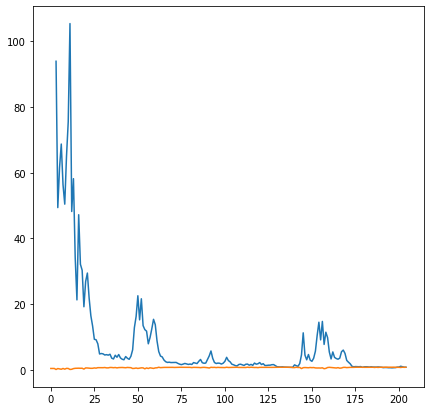

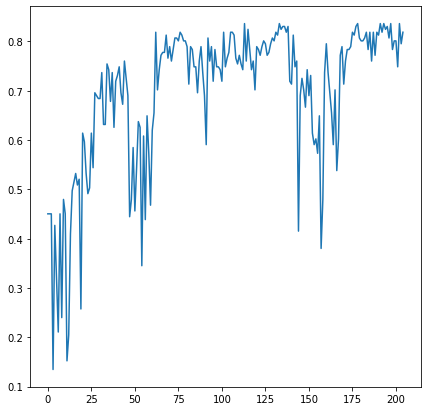

In [12]:
fig=plt.figure(figsize=(7,7))

plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
print(clf.validation_scores_)
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

fig=plt.figure(figsize=(7,7))

#plt.plot(clf.loss_curve_)
#Warning: thiscan be usedonly if early_stopping=True
plt.plot(np.asarray(clf.validation_scores_))

plt.show()

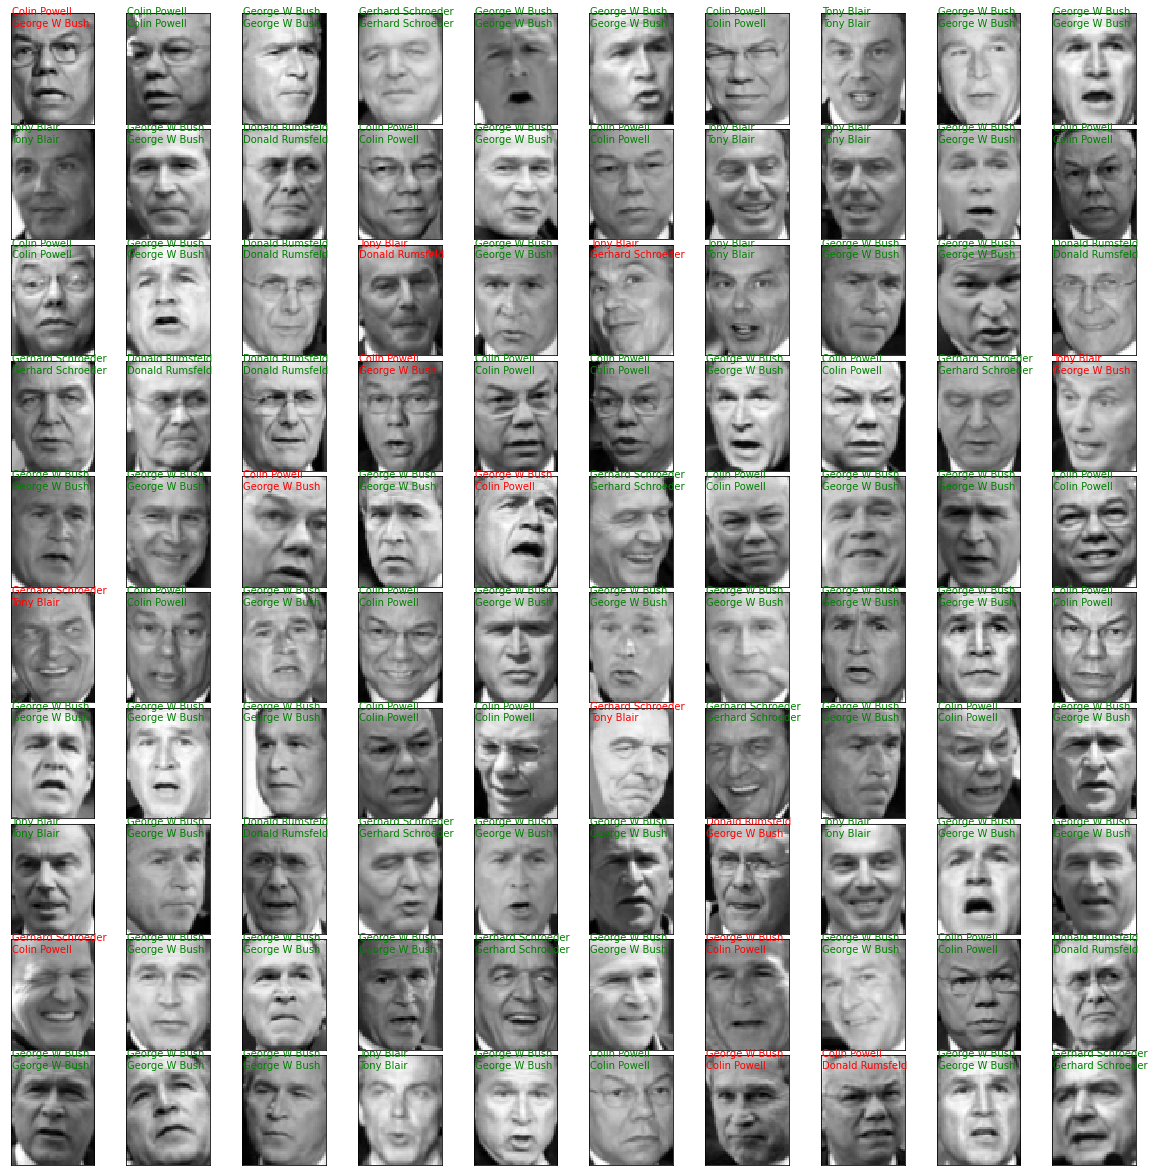

In [13]:
# Plot the prediction
predicted = clf.predict(X_test)

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(16, 16)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(100):
  ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(h,w), cmap=plt.cm.gray, interpolation='nearest')
  # label the image with the target value
  if y_test[i] == predicted[i]:
    ax.text(0, 7, str(target_names[y_test[i]]) +" \n"+str(target_names[predicted[i]]), color='green')
  else:
    ax.text(0, 7, str(target_names[y_test[i]]) +" \n"+str(target_names[predicted[i]]), color='red')

In [14]:

from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        64
           1       0.75      0.66      0.70        32
           2       0.87      0.91      0.89       127
           3       0.68      0.72      0.70        29
           4       0.82      0.82      0.82        33

    accuracy                           0.84       285
   macro avg       0.80      0.79      0.80       285
weighted avg       0.84      0.84      0.84       285



In [15]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 54   3   6   0   1]
 [  1  21   6   3   1]
 [  4   3 116   4   0]
 [  1   0   3  21   4]
 [  0   1   2   3  27]]
